In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("C:\\Users\\nikhi\\Downloads\\Customer Churn.csv")


In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Replacing Blanks with 0 as tenure is 0 and no total charges are recorded

In [6]:
df["TotalCharges"]= df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df["customerID"].duplicated().sum()

np.int64(0)

# Convert 0 and 1 values of senior citizen to yes/no to make it easier to understand

In [9]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"

df["SeniorCitizen"] = df['SeniorCitizen'].apply(conv)

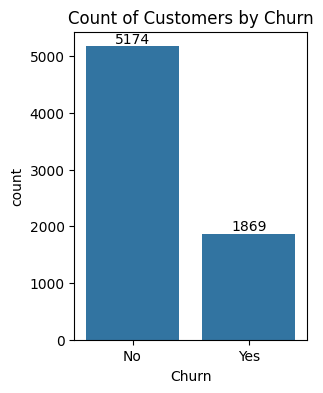

In [10]:
plt.figure(figsize=(3,4))
ax = sns.countplot(x='Churn',data=df)

ax.bar_label(ax.containers[0])         # for showing exact values of bar
plt.title("Count of Customers by Churn")
plt.show()

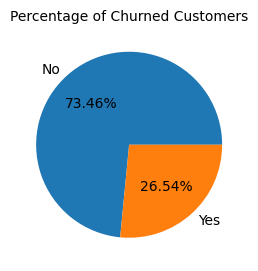

In [11]:
plt.figure(figsize=(3,4))
gb = df.groupby('Churn').agg({'Churn':'count'})
plt.pie(gb['Churn'],labels = gb.index, autopct="%1.2f%%")
plt.title('Percentage of Churned Customers', fontsize = 10)
plt.show()


from the given pie chart we can conclude that 26.54% of customers have churned out.
now let's explore the reason behind it.

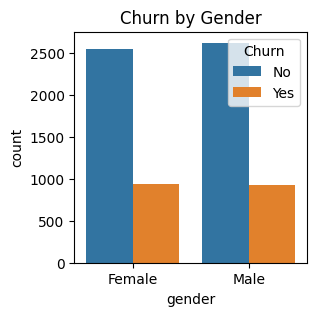

In [12]:
plt.figure(figsize=(3,3))
sns.countplot(x = 'gender',data=df,hue='Churn')
plt.title("Churn by Gender")
plt.show()


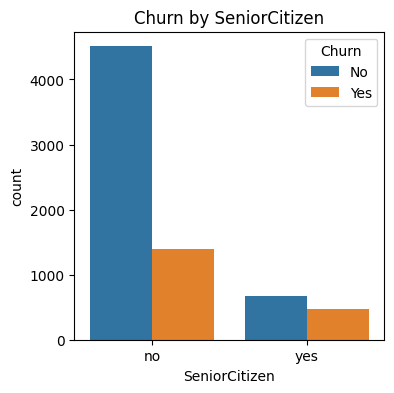

In [13]:
plt.figure(figsize=(4,4))
sns.countplot(x="SeniorCitizen",data=df,hue= 'Churn')
plt.title("Churn by SeniorCitizen")
plt.show()

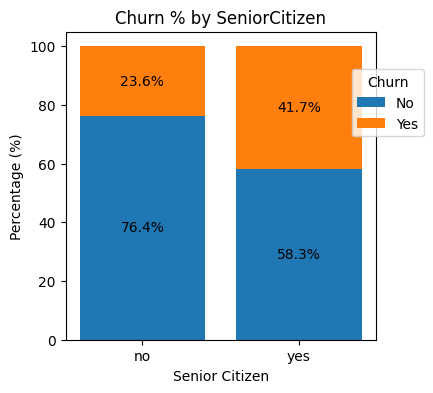

In [23]:
# Count values
counts = df.groupby("SeniorCitizen")["Churn"].value_counts().unstack()

# Convert to percentages
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Plot
plt.figure(figsize=(4,4))

bottom_vals = [0, 0]   # start each stacked bar from bottom

for col in percentages.columns:
    plt.bar(
        percentages.index,
        percentages[col],
        bottom=bottom_vals,
        label=col
    )
    bottom_vals = bottom_vals + percentages[col]

# Add percentage labels
for i in range(len(percentages)):
    cumulative = 0
    for col in percentages.columns:
        height = percentages.iloc[i][col]
        plt.text(
            x=percentages.index[i],
            y=cumulative + height / 2,
            s=f"{height:.1f}%",
            ha='center',
            va='center'
        )
        cumulative += height

plt.title("Churn % by SeniorCitizen")
plt.xlabel("Senior Citizen")
plt.ylabel("Percentage (%)")
plt.legend(title="Churn",bbox_to_anchor = (0.9,0.9))
plt.show()

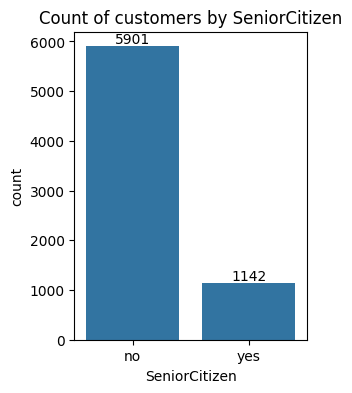

In [19]:
plt.figure(figsize=(3,4))
ax = sns.countplot(x="SeniorCitizen",data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of customers by SeniorCitizen")
plt.show()

comparative a greated percentage of people in senior citizen category have churned

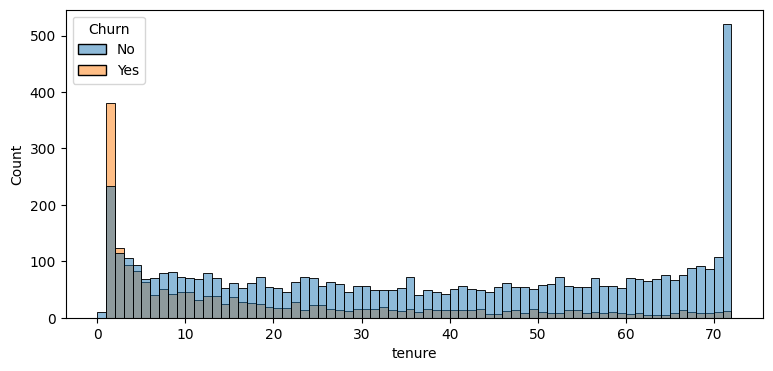

In [28]:
plt.figure(figsize=(9,4))
sns.histplot(x = "tenure",data=df,bins=72,hue='Churn')
plt.show()

people who have used our services for a long time have stayed and people who have used our services #1 or 2 months have churned 

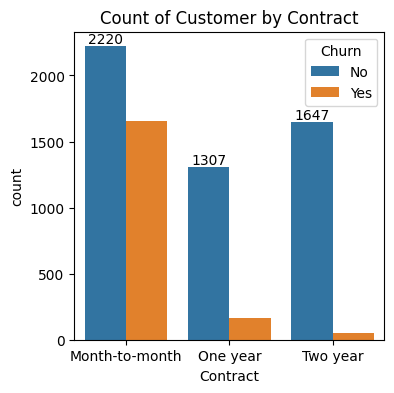

In [34]:
plt.figure(figsize=(4,4))
ax= sns.countplot(x="Contract",data=df,hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by Contract")
plt.show()

people who have month to month contract are likey to churn than from those who have 1 or 2 year contract.

In [36]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

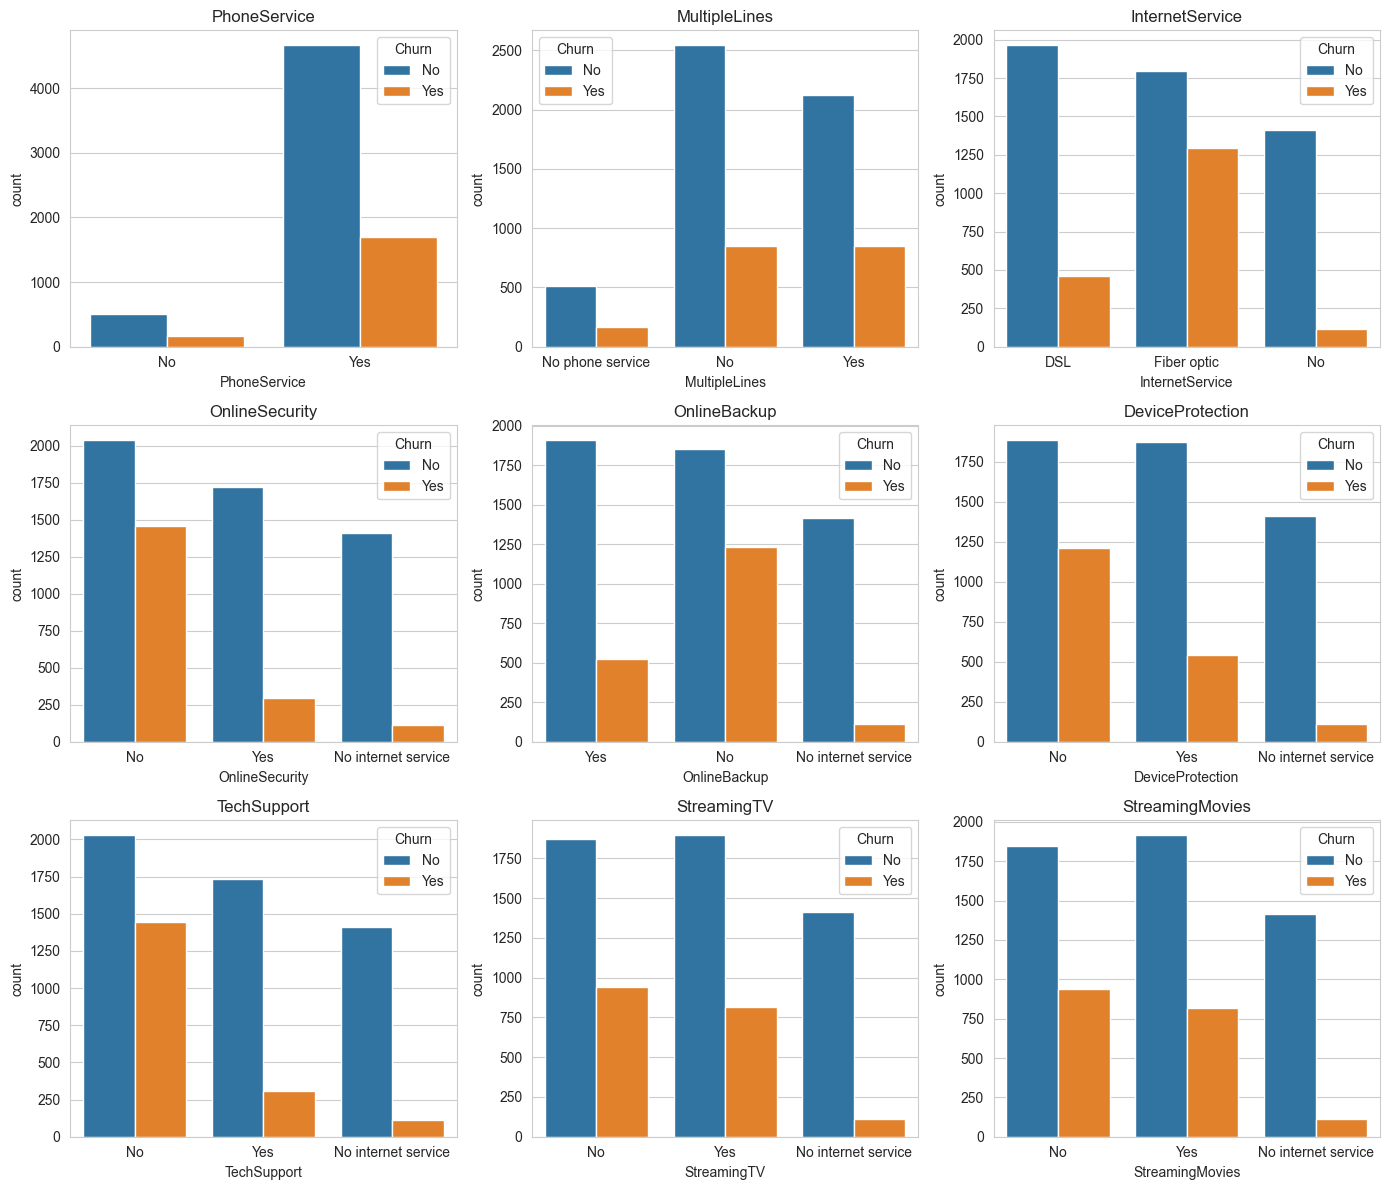

In [41]:
cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

plt.figure(figsize=(14,12))   # overall figure size

for i, col in enumerate(cols, 1):
    plt.subplot(3, 3, i)      # create a 3×3 grid
    ax = sns.countplot(x=col, data=df,hue="Churn")
    plt.title(col)
    plt.tight_layout()


The majority of customers who do not churn tend to have services like PhoneService, InternetSerivce (particularly DSL), and OnlineSecurity anabled. For sevices like OnlineBackup, TechSupport, and StreamingTV. churn rates are noticeably higher when these sevices are not used or are unavailable.

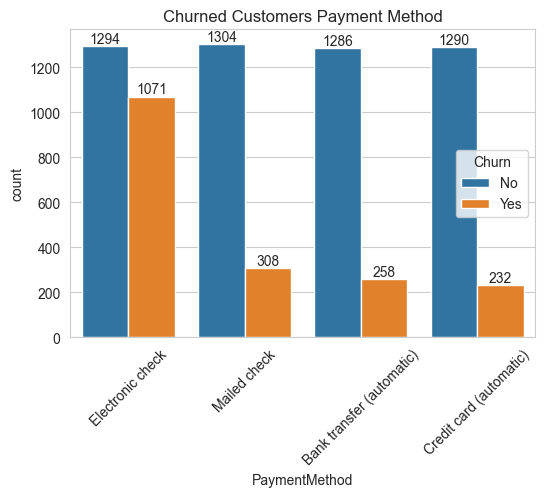

In [54]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x= "PaymentMethod", data=df, hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customers Payment Method")
plt.xticks(rotation=45)
plt.show()

 customer is likely to churn when he is using electronic check as a payment method.